In [3]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

from pettingzoo.classic import tictactoe_v3
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.dqn_agent import DQNAgent
from source.agents.policy_gradient_with_baseline_agent import PolicyGradientWithBaselineAgent
from source.agents.random_agent import RandomAgent
from source.utils import utils
from tqdm import tqdm
import torch
import random
from typing import Dict, Optional, Tuple
from collections import defaultdict
from source.agents.agent import Agent
from pettingzoo.utils.env import AECEnv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


using device: cpu
using device: cpu


100%|██████████| 100/100 [00:09<00:00, 10.04it/s]


step: 0, epsilon: 0.05000000000000002, average_return: 0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.28it/s]


step: 1, epsilon: 0.05000000000000001, average_return: 0.19387755102040816, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


step: 2, epsilon: 0.05, average_return: 0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.43it/s]


step: 3, epsilon: 0.05, average_return: 0.12244897959183673, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.86it/s]


step: 4, epsilon: 0.05, average_return: -0.08163265306122448, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.99it/s]


step: 5, epsilon: 0.05, average_return: -0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


step: 6, epsilon: 0.05, average_return: 0.6428571428571429, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.89it/s]


step: 7, epsilon: 0.05, average_return: -0.10204081632653061, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


step: 8, epsilon: 0.05, average_return: -0.11224489795918367, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.98it/s]


step: 9, epsilon: 0.05, average_return: -0.15306122448979592, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.02it/s]


step: 10, epsilon: 0.05, average_return: 0.21428571428571427, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


step: 11, epsilon: 0.05, average_return: 0.32653061224489793, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.90it/s]


step: 12, epsilon: 0.05, average_return: 0.40816326530612246, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.15it/s]


step: 13, epsilon: 0.05, average_return: 0.5306122448979592, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.04it/s]


step: 14, epsilon: 0.05, average_return: 0.37755102040816324, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.14it/s]


step: 15, epsilon: 0.05, average_return: 0.46938775510204084, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.21it/s]


step: 16, epsilon: 0.05, average_return: 0.01020408163265306, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


step: 17, epsilon: 0.05, average_return: -0.01020408163265306, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.33it/s]


step: 18, epsilon: 0.05, average_return: 0.11224489795918367, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.35it/s]


step: 19, epsilon: 0.05, average_return: 0.12244897959183673, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.35it/s]


step: 20, epsilon: 0.05, average_return: -0.04081632653061224, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.32it/s]


step: 21, epsilon: 0.05, average_return: -0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.31it/s]


step: 22, epsilon: 0.05, average_return: -0.12244897959183673, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


step: 23, epsilon: 0.05, average_return: 0.12244897959183673, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.27it/s]


step: 24, epsilon: 0.05, average_return: 0.24489795918367346, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


step: 25, epsilon: 0.05, average_return: 0.11224489795918367, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.17it/s]


step: 26, epsilon: 0.05, average_return: 0.04081632653061224, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


step: 27, epsilon: 0.05, average_return: -0.05102040816326531, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.63it/s]


step: 28, epsilon: 0.05, average_return: 0.07142857142857142, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.50it/s]


step: 29, epsilon: 0.05, average_return: -0.030612244897959183, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


step: 30, epsilon: 0.05, average_return: -0.030612244897959183, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.27it/s]


step: 31, epsilon: 0.05, average_return: 0.08163265306122448, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.22it/s]


step: 32, epsilon: 0.05, average_return: -0.02040816326530612, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.16it/s]


step: 33, epsilon: 0.05, average_return: 0.0, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.98it/s]


step: 34, epsilon: 0.05, average_return: 0.2755102040816326, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.69it/s]


step: 35, epsilon: 0.05, average_return: 0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.67it/s]


step: 36, epsilon: 0.05, average_return: 0.01020408163265306, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.62it/s]


step: 37, epsilon: 0.05, average_return: 0.02040816326530612, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.14it/s]


step: 38, epsilon: 0.05, average_return: 0.07142857142857142, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.12it/s]


step: 39, epsilon: 0.05, average_return: -0.02040816326530612, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.92it/s]


step: 40, epsilon: 0.05, average_return: 0.04081632653061224, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


step: 41, epsilon: 0.05, average_return: 0.24489795918367346, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


step: 42, epsilon: 0.05, average_return: 0.2653061224489796, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.16it/s]


step: 43, epsilon: 0.05, average_return: -0.05102040816326531, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.17it/s]


step: 44, epsilon: 0.05, average_return: 0.19387755102040816, success rate: 0.0


100%|██████████| 100/100 [00:10<00:00,  9.61it/s]


step: 45, epsilon: 0.05, average_return: 0.14285714285714285, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.30it/s]


step: 46, epsilon: 0.05, average_return: -0.04081632653061224, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


step: 47, epsilon: 0.05, average_return: 0.07142857142857142, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.71it/s]


step: 48, epsilon: 0.05, average_return: 0.061224489795918366, success rate: 0.0


100%|██████████| 100/100 [00:09<00:00, 10.77it/s]


step: 49, epsilon: 0.05, average_return: 0.25510204081632654, success rate: 0.0

rewarding episodes: 519.0


100%|██████████| 5000/5000 [07:41<00:00, 10.83it/s]


player_1: Average return = 0.108
player_2: Average return = -0.108


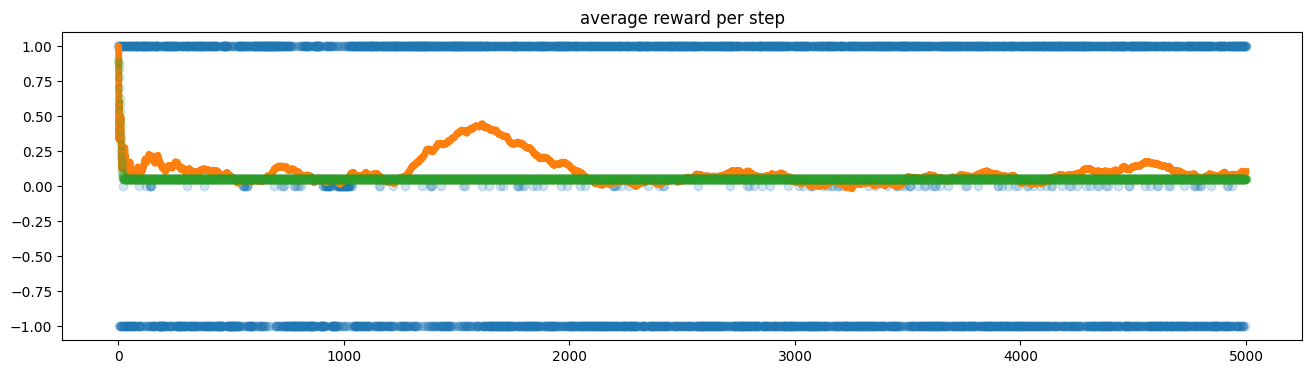

In [10]:
# Policy Eval
# Params
num_epoch = 50
num_episode = 100
video_path = os.path.join(ROOT, "video/dqn_tictactoe.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)
# epsilon decay
epsilon_schedule = utils.create_decay_schedule(num_epoch)
lr_schedule = utils.create_decay_schedule(num_epoch)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
#env = gym.make(
#    "LunarLander-v2",
#    render_mode='rgb_array'
#)
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)
#env = gym.make("CartPole-v1", render_mode='rgb_array')

env = tictactoe_v3.env()
env.np_random = rng

# Create Agent
dqn_agent = DQNAgent(
    state_space=env.observation_space('player_1')['observation'],
    action_space=env.action_space('player_1'),
    discount_rate=0.99,
    epsilon=0.9, # use epsilon_schedule
    learning_rate=1e-3,
    learning=True,
    batch_size = 16,
    tau = 0.005,
    eps_decay=3000,
    net_params={'width':64, 'n_hidden':2},
    update_freq=100
)
pg_agent = PolicyGradientWithBaselineAgent(
    state_space=env.observation_space('player_1')['observation'],
    action_space=env.action_space('player_1'),
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=None,
    policy_lr=1e-3,
    value_lr=1e-3,
    net_params={'width':32, 'n_hidden':1}
)
random_agent = RandomAgent(    
    state_space=env.observation_space('player_2')['observation'],
    action_space=env.action_space('player_2'),
    discount_rate=None,
    epsilon=None, # use epsilon_schedule
    learning_rate=None,
    learning=False
)
agent_dict = {'player_1': dqn_agent, 'player_2':dqn_agent}
eps_history = []
# Start Learning
for i in range(num_epoch):
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = utils.play_multiagent_episode(agent_dict, env)#,epsilon=epsilon_schedule[i])
        history.append(reward['player_1'])
        eps_history.append(agent_dict['player_1']._epsilon)
        total_reward += reward['player_1']
    #score = agent.update()
    print(
        f"step: {i}, epsilon: {dqn_agent._epsilon}, average_return: {np.mean(history[-num_episode+1:-1])}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, num_episode = utils.evaluate_multiagent(agent_dict, env, 5000)
for ag_id, value in avarge_return.items():
    print(f"{ag_id}: Average return = {value / num_episode}")

utils.plot_history(history)
utils.plot_history(eps_history, smoothing=False)

In [ ]:
env = tictactoe_v3.env(render_mode='human')
reward, _ = utils.play_multiagent_episode(agent_dict, env)
#html=utils.render_mp4(video_path)
#HTML(html)


     |     |     
  -  |  -  |  -  
_____|_____|_____
     |     |     
  -  |  -  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  -  
     |     |     
     |     |     
  -  |  O  |  -  
_____|_____|_____
     |     |     
  -  |  -  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  -  
     |     |     
     |     |     
  -  |  O  |  -  
_____|_____|_____
     |     |     
  -  |  X  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  -  
     |     |     
     |     |     
  -  |  O  |  -  
_____|_____|_____
     |     |     
  O  |  X  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  -  
     |     |     
     |     |     
  X  |  O  |  -  
_____|_____|_____
     |     |     
  O  |  X  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  -  
     |     |     
     |     |     
  X  |  O  |  -  
_____|_____|_____
     |     |     
  O  |  X  |  X  
_____|_____|_____
     |     |     
  -  |  -  |  O  
     |     |     
     |     |     
  X  |  O 